In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [15]:
#Custom colors
custom_colors = ['#a7308f', '#e233bc','#ff65c3', '#ff9ecc', '#ffc3e2']

In [16]:
# Loading the data
data = pd.read_csv('game_details_with_counts.csv')

# Creating 'cult_classic' feature
data['cult_classic'] = ((data['users_rated'] > 5000) & 
                        (data['average_rating'] > 8.0)).astype(int)

# Selecting relevant features for Decision Tree modeling
features = data[['category_count', 'mechanic_count', 'min_players', 'max_players', 'min_playtime', 'max_playtime', 'weight', 'users_rated']]
target = data['cult_classic']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Checking the first few rows of the dataset
print(data[['name', 'cult_classic']].head())


                name  cult_classic
0              CATAN             0
1        Carcassonne             0
2           Pandemic             0
3          7 Wonders             0
4  Terraforming Mars             1


Accuracy: 0.9511111111111111
Confusion Matrix:
 [[840  20]
 [ 24  16]]


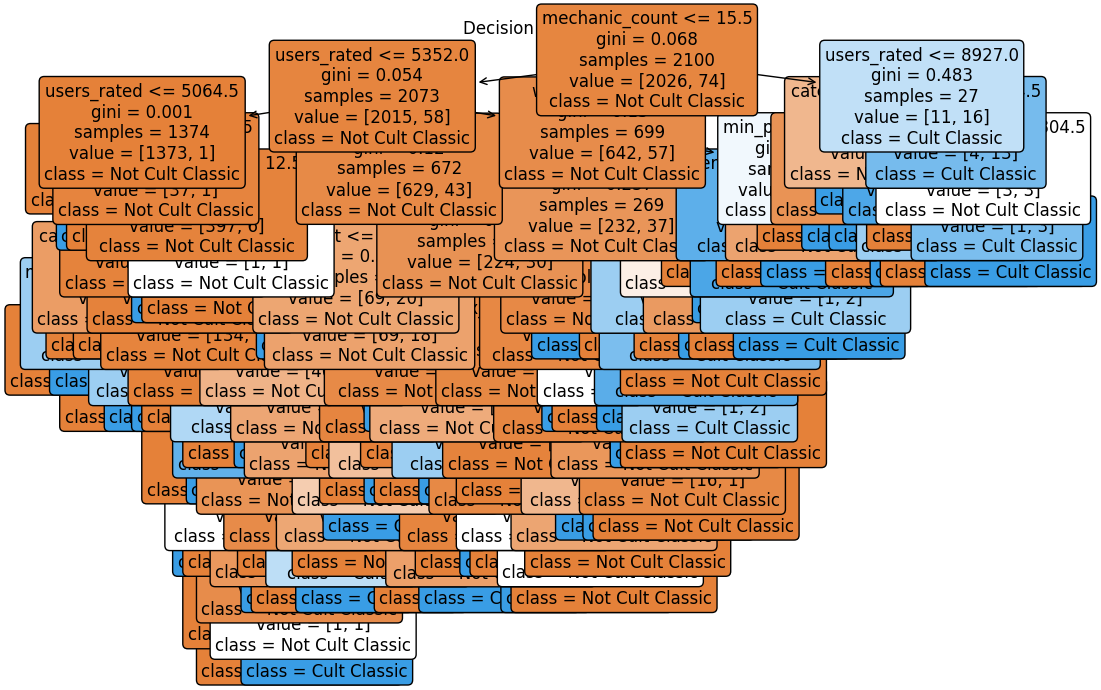

In [ ]:
# Initializing the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fitting the model on the training data
dt.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing the tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=features.columns, class_names=['Not Cult Classic', 'Cult Classic'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree Classifier")
plt.show()


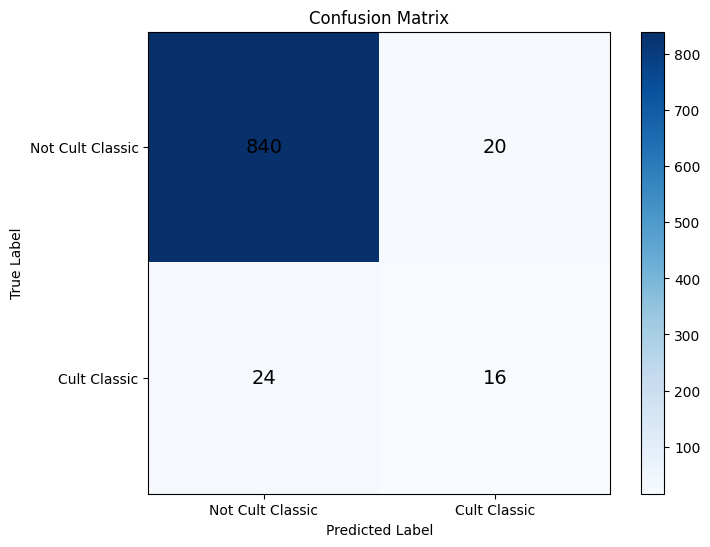

Accuracy of the Decision Tree: 0.9511111111111111


In [18]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.yticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotating the confusion matrix with values
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.show()

# Print the accuracy
print("Accuracy of the Decision Tree:", accuracy)


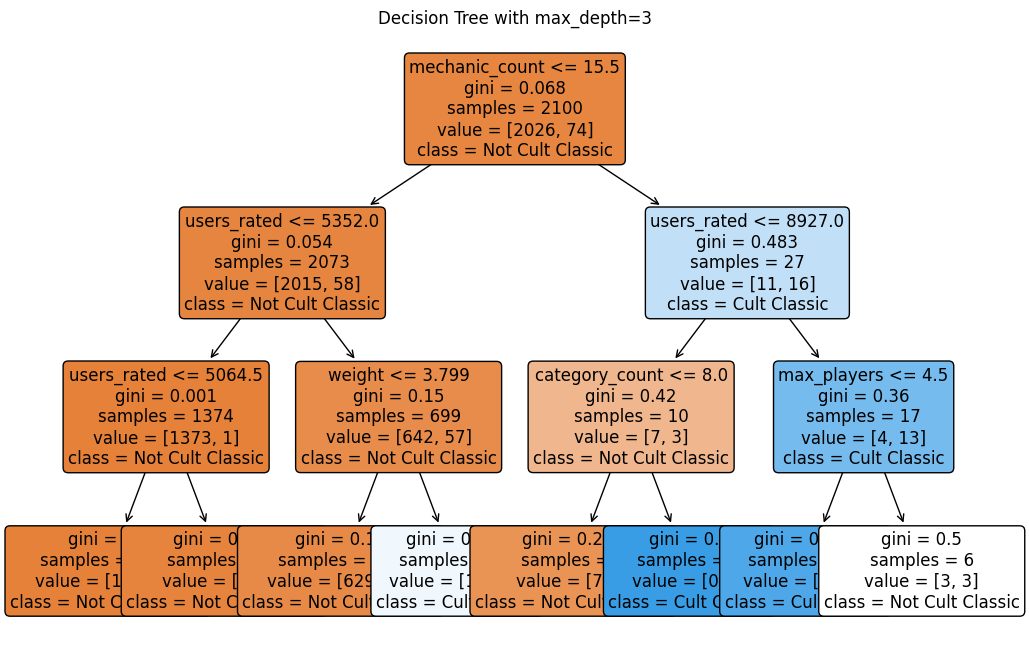

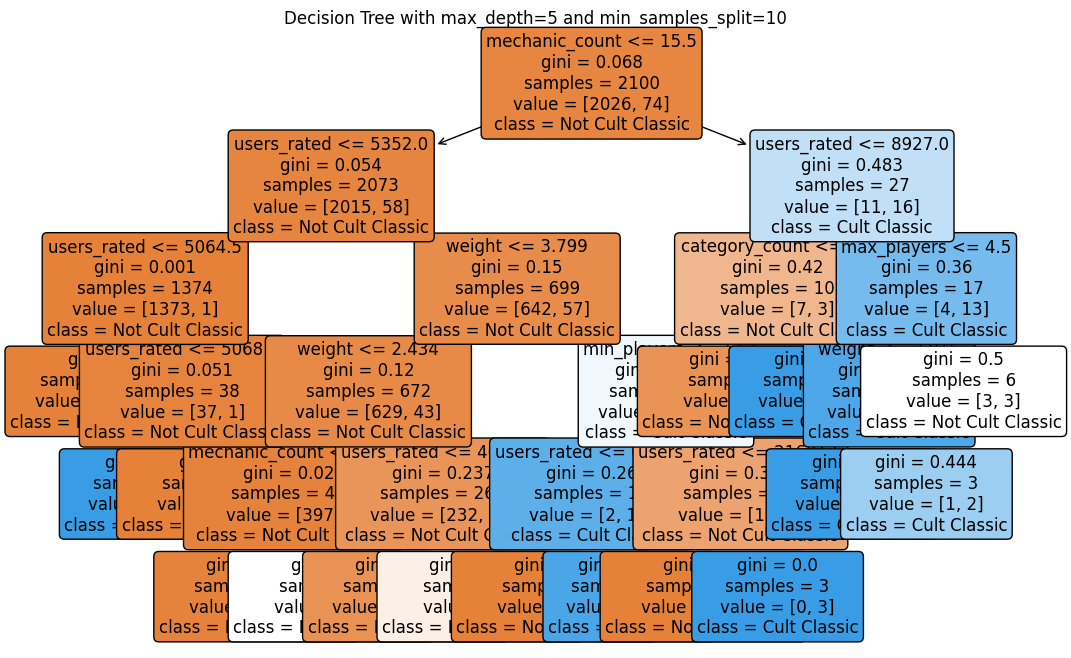

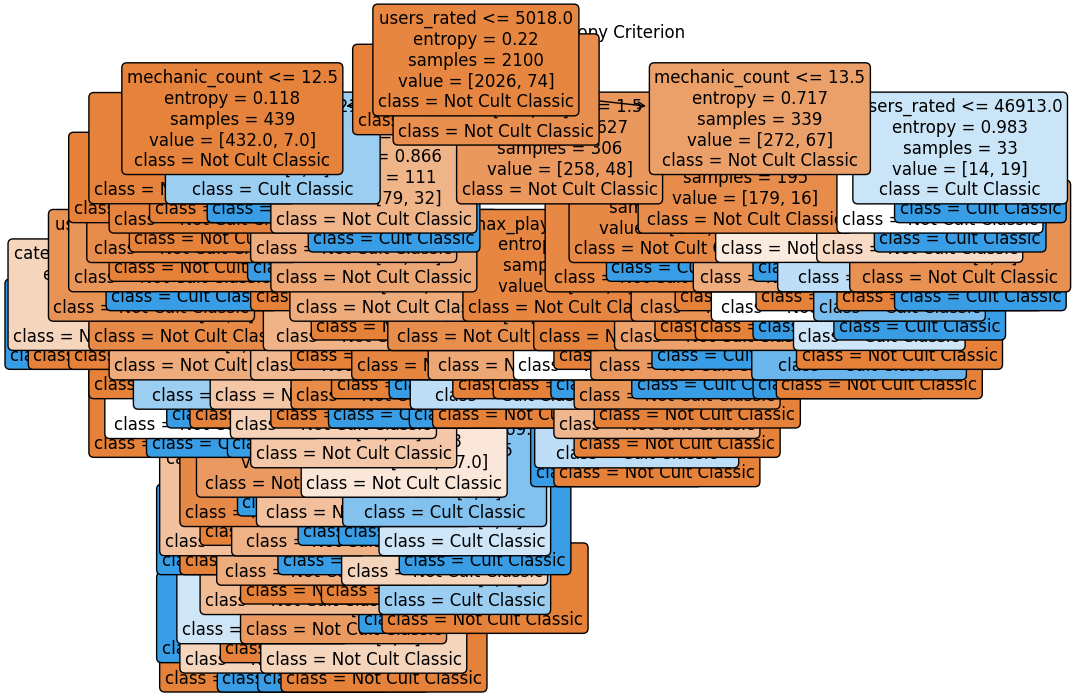

In [19]:
# Example 1: Decision Tree with max_depth=3
dt1 = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
dt1.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(dt1, feature_names=features.columns, class_names=['Not Cult Classic', 'Cult Classic'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree with max_depth=3")
plt.show()

# Example 2: Decision Tree with max_depth=5 and min_samples_split=10
dt2 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion='gini', random_state=42)
dt2.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(dt2, feature_names=features.columns, class_names=['Not Cult Classic', 'Cult Classic'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree with max_depth=5 and min_samples_split=10")
plt.show()

# Example 3: Decision Tree with entropy criterion
dt3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt3.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(dt3, feature_names=features.columns, class_names=['Not Cult Classic', 'Cult Classic'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree with Entropy Criterion")
plt.show()
